<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                       0
source                                             0
name                                               0
description                                      738
neighborhood_overview                           9773
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4998
Length: 72, dtype: int64

In [ ]:
#Calculamos el numero total de la población "n"
Barcelona['review_scores_checkin']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
13925 non-null  float64
dtypes: float64(1)
memory usage: 148.0 KB


In [6]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['review_scores_checkin'].max()
Min=Barcelona['review_scores_checkin'].min()
Limites= [Min, Max]
Limites

[0.0, 5.0]

In [7]:
#Calculamos el rango R
R=Max-Min
R

5.0

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(18927)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.2551056257663127

**Creación de Categorias a partir de clases**

In [9]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-.99, 5.1, 16)
intervalos

array([-0.99 , -0.584, -0.178,  0.228,  0.634,  1.04 ,  1.446,  1.852,
        2.258,  2.664,  3.07 ,  3.476,  3.882,  4.288,  4.694,  5.1  ])

In [ ]:
#Creamos las categorías 
categorias= ["Categoría1 (-0.99--0.58 review_scores_checkin)", "Categoría2 (-0.59--0.17 review_scores_checkin)","Categoría3 (-0.18-0.22 review_scores_checkin)", "Categoría4 (0.23-0.63 review_scores_checkin)",
             "Categoría5 (0.64-1.04 review_scores_checkin)", "Categoría6 (1.05-1.44 review_scores_checkin)","Categoría7 (1.45-1.85 review_scores_checkin)", "Categoría8 (1.86-2.25 review_scores_checkin)", "Categoría9 (2.26-2.66 review_scores_checkin)", "Categoría10 (2.67-3.07 review_scores_checkin)","Categoría11 (3.08-3.47 review_scores_checkin)", "Categoría12 (3.48-3.88 review_scores_checkin)",
             "Categoría13 (3.89-4.28 review_scores_checkin)", "Categoría14 (4.29-4.69 review_scores_checkin)","Categoría15 (4.70-5.1 review_scores_checkin)"
             ]

In [11]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['review_scores_checkin']=pd.cut(x= Barcelona['review_scores_checkin'], bins=intervalos, labels= categorias)
Barcelona['review_scores_checkin']

0           Categoría14 (4.29-4.69 review_scores_accuracy)
1        Categoría15 (4.70-5.1 resporeview_scores_accur...
2        Categoría15 (4.70-5.1 resporeview_scores_accur...
3           Categoría14 (4.29-4.69 review_scores_accuracy)
4           Categoría10 (2.67-3.07 review_scores_accuracy)
                               ...                        
18922                                                  NaN
18923                                                  NaN
18924                                                  NaN
18925                                                  NaN
18926                                                  NaN
Name: review_scores_checkin, Length: 18927, dtype: category
Categories (15, object): ['Categoría1 (-0.99--0.58 review_scores_accuracy)' < 'Categoría2 (-0.59--0.17 review_scores_accuracy)' < 'Categoría3 (-0.18-0.22 review_scores_accuracy)' < 'Categoría4 (0.23-0.63 review_scores_accuracy)' ... 'Categoría12 (3.48-3.88 review_scores_accuracy)' < 'Catego

In [12]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['review_scores_checkin'].value_counts().reset_index()
Tabla_freq

review_scores_checkin  count
0   Categoría15 (4.70-5.1 resporeview_scores_accur...  10146
1      Categoría14 (4.29-4.69 review_scores_accuracy)   2563
2      Categoría13 (3.89-4.28 review_scores_accuracy)    721
3      Categoría12 (3.48-3.88 review_scores_accuracy)    153
4      Categoría10 (2.67-3.07 review_scores_accuracy)    151
5       Categoría5 (0.64-1.04 review_scores_accuracy)     77
6       Categoría8 (1.86-2.25 review_scores_accuracy)     49
7      Categoría11 (3.08-3.47 review_scores_accuracy)     45
8       Categoría9 (2.26-2.66 review_scores_accuracy)     16
9      Categoría3 (-0.18-0.22 review_scores_accuracy)      2
10      Categoría7 (1.45-1.85 review_scores_accuracy)      2
11    Categoría1 (-0.99--0.58 review_scores_accuracy)      0
12    Categoría2 (-0.59--0.17 review_scores_accuracy)      0
13      Categoría4 (0.23-0.63 review_scores_accuracy)      0
14      Categoría6 (1.05-1.44 review_scores_accuracy)      0

In [13]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

review_scores_checkin  count
0   Categoría15 (4.70-5.1 resporeview_scores_accur...  10146
1      Categoría14 (4.29-4.69 review_scores_accuracy)   2563
2      Categoría13 (3.89-4.28 review_scores_accuracy)    721
3      Categoría12 (3.48-3.88 review_scores_accuracy)    153
4      Categoría10 (2.67-3.07 review_scores_accuracy)    151
5       Categoría5 (0.64-1.04 review_scores_accuracy)     77
6       Categoría8 (1.86-2.25 review_scores_accuracy)     49
7      Categoría11 (3.08-3.47 review_scores_accuracy)     45
8       Categoría9 (2.26-2.66 review_scores_accuracy)     16
9      Categoría3 (-0.18-0.22 review_scores_accuracy)      2
10      Categoría7 (1.45-1.85 review_scores_accuracy)      2

In [14]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('review_scores_checkin')
Filtro_index

count
review_scores_checkin                                    
Categoría15 (4.70-5.1 resporeview_scores_accura...  10146
Categoría14 (4.29-4.69 review_scores_accuracy)       2563
Categoría13 (3.89-4.28 review_scores_accuracy)        721
Categoría12 (3.48-3.88 review_scores_accuracy)        153
Categoría10 (2.67-3.07 review_scores_accuracy)        151
Categoría5 (0.64-1.04 review_scores_accuracy)          77
Categoría8 (1.86-2.25 review_scores_accuracy)          49
Categoría11 (3.08-3.47 review_scores_accuracy)         45
Categoría9 (2.26-2.66 review_scores_accuracy)          16
Categoría3 (-0.18-0.22 review_scores_accuracy)          2
Categoría7 (1.45-1.85 review_scores_accuracy)           2

Text(0, 0.5, 'Frecuencia')

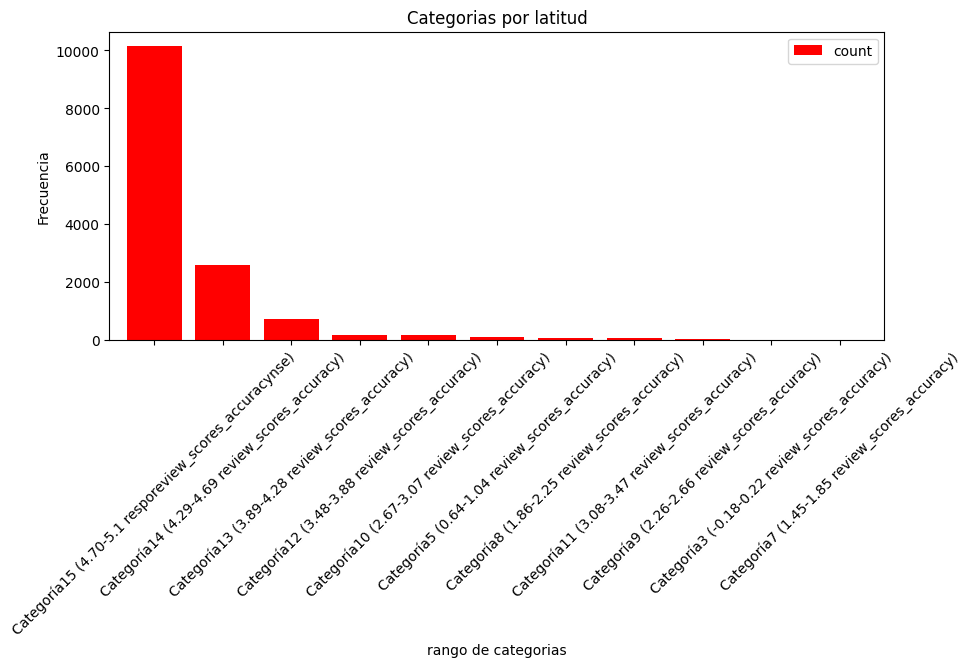

In [15]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')